In [1]:
#Selecting a style for printing

#You are creating a figure that will be included in a leaflet printed on a black-and-white printer. What style should you choose
#for your figures?

#In the console, we have loaded the medals dataset. Before initializing Axes and Figure objects and plotting them, you can try
#setting a style to use.

#'seaborn-colorblind'

#'grayscale'*

#'tableau-colorblind10'

#'bmh'

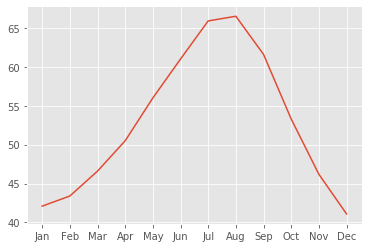

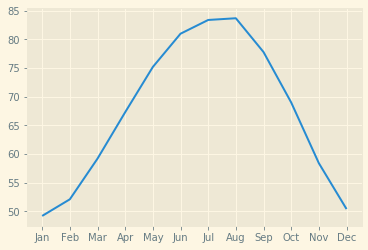

In [2]:
#Switching between styles

import matplotlib.pyplot as plt
import pandas as pd
seattle_weather = pd.read_csv('datasets/seattle_weather.csv', index_col='DATE')
seattle_weather = seattle_weather[seattle_weather['NAME'] == 'SEATTLE SAND PT WSFO, WA US']
seattle_weather['MONTH'] = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
austin_weather = pd.read_csv('datasets/austin_weather.csv', index_col='DATE')
austin_weather = austin_weather[austin_weather['NAME'] == 'AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US']
austin_weather['MONTH'] = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

#Selecting a style to use affects all of the visualizations that are created after this style is selected.

#Here, you will practice plotting data in two different styles. The data you will use is the same weather data we used in the
#first lesson: you will have available to you the DataFrame seattle_weather and the DataFrame austin_weather, both with records
#of the average temperature in every month.

# Use the "ggplot" style and create new Figure/Axes
plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-TAVG-NORMAL"])
plt.show()

# Use the "Solarize_Light2" style and create new Figure/Axes
plt.style.use('Solarize_Light2')
fig, ax = plt.subplots()
ax.plot(austin_weather["MONTH"], austin_weather["MLY-TAVG-NORMAL"])
plt.show()

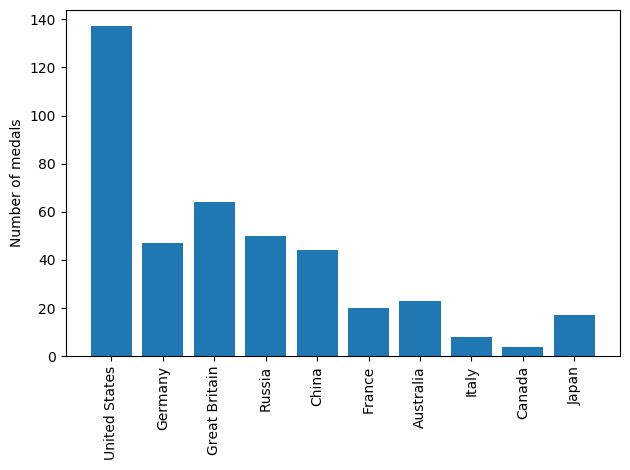

In [3]:
#Saving a file several times

import pandas as pd
import matplotlib.pyplot as plt
medals = pd.read_csv('datasets/medals_by_country_2016.csv', index_col=0)
plt.style.use('default') #Para cambiar al estilo por defecto
fig, ax = plt.subplots()
ax.bar(medals.index, medals['Gold'])
ax.set_xticklabels(medals.index, rotation=90)
ax.set_ylabel('Number of medals')
plt.tight_layout() #Funcion para que no recorte las etiquetas del eje x

#If you want to share your visualizations with others, you will need to save them into files. Matplotlib provides as way to do
#that, through the savefig method of the Figure object. In this exercise, you will save a figure several times. Each time
#setting the parameters to something slightly different. We have provided and already created Figure object

# Show the figure
plt.show()

# Save as a PNG file
fig.savefig('my_figure.png')

# Save as a PNG file with 300 dpi
fig.savefig('my_figure_300dpi.png', dpi=300)

In [4]:
#Save a figure with different sizes

#Before saving your visualization, you might want to also set the size that the figure will have on the page. To do so, you can
#use the Figure object's set_size_inches method. This method takes a sequence of two values. The first sets the width and the
#second sets the height of the figure.

#Here, you will again have a Figure object called fig already provided (you can run plt.show if you want to see its contents).
#Use the Figure methods set_size_inches and savefig to change its size and save two different versions of this figure.

# Set figure dimensions and save as a PNG
fig.set_size_inches([3, 5])
fig.savefig('figure_3_5.png', bbox_inches='tight') #bbox_inches='tight' -> Argumento para que no recorte las etiquetas del eje x

# Set figure dimensions and save as a PNG
fig.set_size_inches([5, 3])
fig.savefig('figure_5_3.png', bbox_inches='tight')

In [5]:
#Unique values of a column

import pandas as pd
summer_2016 = pd.read_csv('datasets/summer2016.csv')
sports_list = ['Rowing','Taekwondo','Handball','Wrestling','Gymnastics','Swimming','Basketball','Boxing','Volleyball',
               'Athletics']
dic = {}
for sport in sports_list:
    summer_df = summer_2016[summer_2016["Sport"] == sport]
    dic[sport] = summer_df
    summer_2016_medals = pd.concat(dic, ignore_index=True)
summer_2016_medals.set_index('ID')

#One of the main strengths of Matplotlib is that it can be automated to adapt to the data that it receives as input. For
#example, if you receive data that has an unknown number of categories, you can still create a bar plot that has bars for each
#category.

#In this exercise and the next, you will be visualizing the weight of medalis in the 2016 summer Olympic Games again, from a
#dataset that has some unknown number of branches of sports in it. This will be loaded into memory as a Pandas DataFrame object
#called summer_2016_medals, which has a column called "Sport" that tells you to which branch of sport each row corresponds.
#There is also a "Weight" column that tells you the weight of each athlete.

#In this exercise, we will extract the unique values of the "Sport" column

# Extract the "Sport" column
sports_column = summer_2016_medals['Sport']

# Find the unique values of the "Sport" column
sports = sports_column.unique()

# Print out the unique sports values
print(sports)

['Rowing' 'Taekwondo' 'Handball' 'Wrestling' 'Gymnastics' 'Swimming'
 'Basketball' 'Boxing' 'Volleyball' 'Athletics']


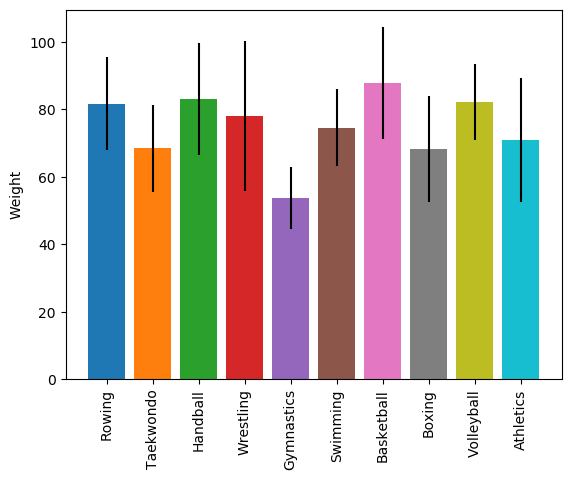

In [6]:
#Automate your visualization

#One of the main strengths of Matplotlib is that it can be automated to adapt to the data that it receives as input. For
#example, if you receive data that has an unknown number of categories, you can still create a bar plot that has bars for each
#category.

#This is what you will do in this exercise. You will be visualizing data about medal winners in the 2016 summer Olympic Games
#again, but this time you will have a dataset that has some unknown number of branches of sports in it. This will be loaded into
#memory as a Pandas DataFrame object called summer_2016_medals, which has a column called "Sport" that tells you to which branch
#of sport each row corresponds. There is also a "Weight" column that tells you the weight of each athlete.

fig, ax = plt.subplots()

# Loop over the different sports branches
for sport in sports:
  # Extract the rows only for this sport
  sport_df = summer_2016_medals[summer_2016_medals['Sport'] == sport]
  # Add a bar for the "Weight" mean with std y error bar
  ax.bar(sport, sport_df['Weight'].mean(), yerr=sport_df['Weight'].std())

ax.set_ylabel("Weight")
ax.set_xticklabels(sports, rotation=90)

# Save the figure to file
fig.savefig('sports_weights.png', bbox_inches='tight')